# NYT Analysis 3 - Archived API

In [1]:
import json
import os
import nltk
from collections import Counter
from pylab import *

In [2]:
rootdir = os.path.dirname(os.path.dirname(os.getcwd()))+'/data/nyt_archive_data/'

Get all authors from past three years first

In [3]:
author_list = []
for year in [2014, 2015, 2016]:
    for month in list(range(1, 13)):
        filename = rootdir+'NYT'+str(year)+'{0:02}'.format(month)+'Archive.json'
        allnews = json.loads(open(filename).read())['response']['docs']
        for news in allnews:
            if news['byline'] != None:
                if 'original' in news['byline']:
                    original = news['byline']['original']
                    author_list.append(original)

In [4]:
len(author_list)

220745

- Clean up the author data including unnecsssary words, spaces
- Check for co-writers and store them seperately

In [5]:
author_list = [x.title() for x in author_list]

In [6]:
author_list = [x.replace('By ','') for x in author_list if 'By ' in x]

In [7]:
auth_names = []
for x in author_list:
    tokenized_x = nltk.word_tokenize(x)
    if 'And' in tokenized_x:
        if ',' in tokenized_x:  # means there are more than 2 authors                
            seperator_list = [i for i,y in enumerate(tokenized_x) if y == ',']
                
            #get names seperated by ','
            for i in seperator_list:                    
                lm = []
                am = 0
                while am < i:
                    lm.append(tokenized_x[am]+' ')
                    am = am + 1
                sm = ''.join(lm)
            lls = sm.split(',')     
            for s in lls: auth_names.append(s)
                            
            # get the name between last ',' and 'And'
            lm = tokenized_x[seperator_list[-1]+1:tokenized_x.index('And')]           
            sm = ' '.join(lm)
            auth_names.append(sm)
                
            #get name after 'And'
            ll = tokenized_x[tokenized_x.index('And')+1:]           
            sl = ' '.join(ll)
            auth_names.append(sl) 

        else:  #means there are two authors
            ap = tokenized_x.index('And')
            
            name1 = tokenized_x[:ap]   
            sn1 = ' '.join(name1)
            auth_names.append(sn1)
            
            name2 = tokenized_x[ap+1:]
            sn2 = ' '.join(name2)
            auth_names.append(sn2)

In [8]:
print(len(auth_names), auth_names[:20])

33044 ['Jack Ewing ', 'Neil Gough', 'David Jolly', 'Kate Taylor', 'Matt Flegenheimer', 'Anne Barnard', 'Hwaida Saad', 'Kareem Fahim', 'Asmaa Al Zohairy', 'Eli Rosenberg', 'Michael Schwirtz', 'Michael R. Gordon', 'Jodi Rudoren', 'Robert Pear', 'Abby Goodnough', 'Emma G. Fitzsimmons', 'Eli Rosenberg', 'Steve Kenny', 'Robert Pear', 'Nicholas Kulish']


In [9]:
auth_names = [n.strip() for n in auth_names if n!='']

In [10]:
Counter(auth_names).most_common(50)

[('Sandra Stevenson', 380),
 ('Maggie Haberman', 374),
 ('Andrea Kannapell', 365),
 ('Michael D. Shear', 281),
 ('Jonathan Martin', 247),
 ('David E. Sanger', 242),
 ('Eric Schmitt', 239),
 ('Michael R. Gordon', 213),
 ('Michael J . De La Merced', 213),
 ('Ashley Parker', 206),
 ('Mike Isaac', 184),
 ('J. David Goodman', 181),
 ('Robin Lindsay', 180),
 ('Michael S. Schmidt', 175),
 ('Andy Newman', 174),
 ('Matt Flegenheimer', 174),
 ('Alan Blinder', 173),
 ('Anne Barnard', 169),
 ('Amy Chozick', 167),
 ('Annie Correal', 163),
 ('Rick Gladstone', 158),
 ('Richard Pérez-Peña', 158),
 ('Chris Buckley', 153),
 ('Patrick Healy', 153),
 ('Peter Baker', 153),
 ('Kareem Fahim', 152),
 ('Rick Rojas', 152),
 ('Julie Hirschfeld Davis', 146),
 ('Ainara Tiefenthäler', 145),
 ('Al Baker', 141),
 ('Josh Katz', 139),
 ('Gregor Aisch', 139),
 ('Kevin Quealy', 136),
 ('Adeel Hassan', 136),
 ('Marc Santora', 134),
 ('Thomas Kaplan', 134),
 ('Matthew Goldstein', 134),
 ('Ben Protess', 132),
 ('Matt Apuzzo

Draw a simple graph

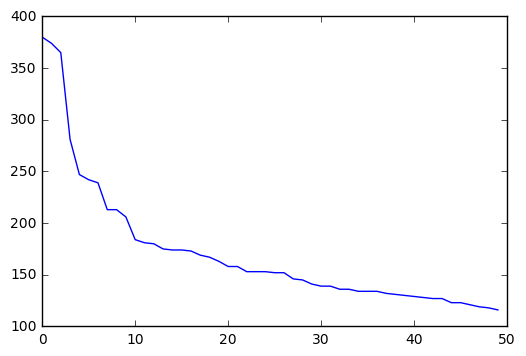

In [11]:
l = Counter(auth_names).most_common(50)
x_l = []
y_l = []

a = 0
while a < 50:
    x_l.append(a)
    y_l.append(l[a][1])
    a += 1
plot(x_l, y_l, linewidth=1.0)
show()